In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [71]:
from xgboost import XGBClassifier

## Read Data

In [72]:
data = pd.read_csv('INFORM Risk 2024.csv')

In [73]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,DRR,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Countries in HVC,Recentness data (average years)
1,(a-z),(a-z),(0-10),(Very Low-Very High),(1-191),(0-10),(0-10),(0-10),(0-10),(0-10),...,(0-10),(0-10),(0-10),(0-10),(0-10),(0-10),(0-50),(0-100%),(Yes/No),()
2,Afghanistan,AFG,8.1,Very High,4,-187.4,8.7,5.7,8.7,7.3,...,6.3,8.0,7.0,6.3,6.5,8.1,4,8%,YES,-28.31
3,Albania,ALB,3.1,Low,104,-156.3,3.4,5.7,8.3,4.6,...,x,5.7,2.3,2.0,1.4,3.4,6,12%,NaN,-29.61
4,Algeria,DZA,3.6,Medium,81,-144.2,3.8,3.2,7.9,3.6,...,3.5,6.5,3.7,2.9,4.1,4.1,0,0%,NaN,-27.04


### Change columns headers

In [74]:
header = data.iloc[0]
data = data[2:]
data.columns = header

In [75]:
data.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,DRR,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Countries in HVC,Recentness data (average years)
2,Afghanistan,AFG,8.1,Very High,4,-187.4,8.7,5.7,8.7,7.3,...,6.3,8.0,7.0,6.3,6.5,8.1,4,8%,YES,-28.31
3,Albania,ALB,3.1,Low,104,-156.3,3.4,5.7,8.3,4.6,...,x,5.7,2.3,2.0,1.4,3.4,6,12%,NaN,-29.61
4,Algeria,DZA,3.6,Medium,81,-144.2,3.8,3.2,7.9,3.6,...,3.5,6.5,3.7,2.9,4.1,4.1,0,0%,NaN,-27.04
5,Angola,AGO,5.2,High,32,-142.3,4.2,2.9,0.1,3.9,...,5.2,6.9,7.3,6.3,7.9,7.8,0,0%,NaN,-26.69
6,Antigua and Barbuda,ATG,2.3,Low,151,-183.8,2.0,3.7,5.1,0.0,...,5.4,5.3,1.3,0.2,0.7,3.1,18,35%,NaN,-35.21


In [76]:
#data = data.info()

In [77]:
pd.options.display.max_rows = 1000

### Checked types of each column

In [78]:
#for column in data.columns:
    #print(data[column][2], type(data[column][2]))

### Replace 'error' and 'x' with null

In [79]:
data.replace(to_replace='#ERROR!', value=None, inplace=True)

In [80]:
data.replace(to_replace='x', value=None, inplace=True)

### Change most columns to floats

In [81]:
for col in data.columns[6:39]:
    data[col] = data[col].astype(float)

In [82]:
columns = ['INFORM RISK','Rank', 'Lack of Reliability (*)', 'Recentness data (average years)']
data[columns] = data[columns].astype(float)

### Fill null values

In [83]:
#data.isna().sum()

In [84]:
data['Countries in HVC'].fillna(value='NO', inplace=True)

In [85]:
data['DRR'] = data['DRR'].fillna(value=data['DRR'].mean())

In [86]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].fillna(value=0)

In [87]:
data['Inequality'] = data['Inequality'].fillna(value=data['Inequality'].mean())

### For some reason the "Korea DPR" row is messed up > replace nulls with their real values

In [88]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].fillna(value=.35)
data['Number of Missing Indicators'] = data['Number of Missing Indicators'].fillna(value=16)
data['Lack of Reliability (*)'] = data['Lack of Reliability (*)'].fillna(value= -170)

### For some reason Liechenstein does not have data on health care, replaced with value similar to countries with a similar overall index

In [89]:
data['Access to health care'] = data['Access to health care'].fillna(value=.8)

In [90]:
data['Health Conditions'] = data['Health Conditions'].fillna(value=.1)

### Remove percent symbol so you can convert this column to float 

In [91]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].str.replace('%', '', regex=True)

In [92]:
data['% of Missing Indicators'] = data['% of Missing Indicators'].astype(float)

In [93]:
data['% of Missing Indicators'] = data['% of Missing Indicators'] / 100

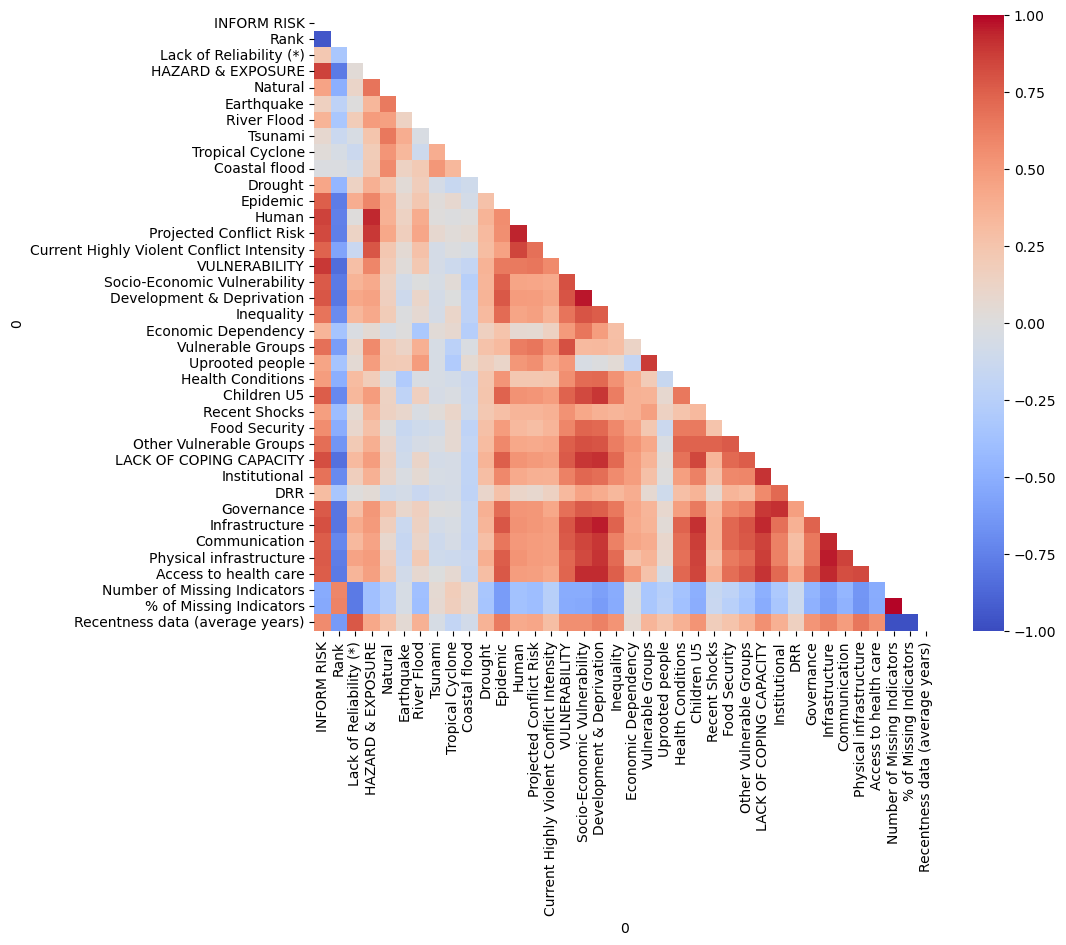

In [94]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10,8))
matrix = np.triu(corr)
sns.heatmap(data=corr, cmap='coolwarm', vmin=-1, vmax=1, mask=matrix)
plt.show()

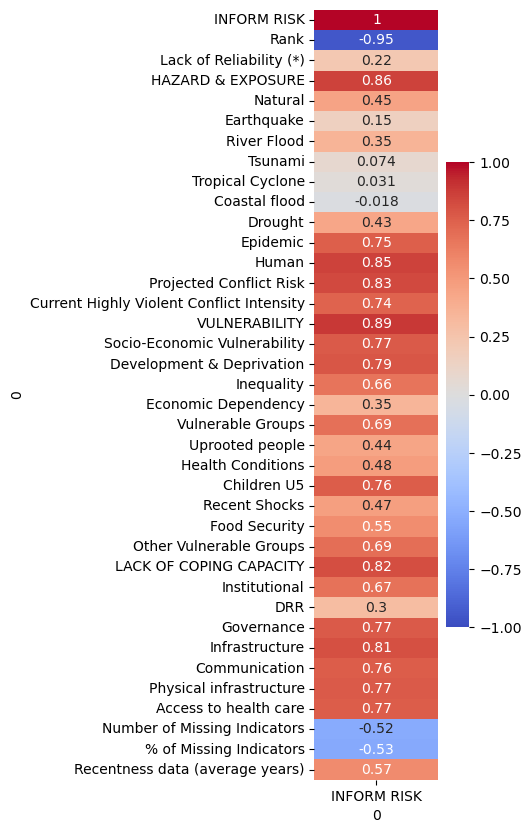

In [95]:
index_corr = corr.loc[["INFORM RISK"]].transpose()

plt.figure(figsize=(2,10))
sns.heatmap(data=index_corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

## Dummy Variables

In [96]:
strings = [col for col in data.columns if data[col].dtype == 'object']
strings

['COUNTRY', 'ISO3', 'RISK CLASS', 'Countries in HVC']

In [97]:
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    
    dataframe = dataframe.drop([name_of_column], axis=1)
    
    return dataframe

In [98]:
data = _transform_column_into_dummies(data, 'Countries in HVC')


,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES
2,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,7.3,...,8.0,7.0,6.3,6.5,8.1,4.0,0.08,-28.31,0,1
3,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,4.6,...,5.7,2.3,2.0,1.4,3.4,6.0,0.12,-29.61,1,0
4,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,3.6,...,6.5,3.7,2.9,4.1,4.1,0.0,0.00,-27.04,1,0
5,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,3.9,...,6.9,7.3,6.3,7.9,7.8,0.0,0.00,-26.69,1,0
6,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,0.0,...,5.3,1.3,0.2,0.7,3.1,18.0,0.35,-35.21,1,0


In [99]:
data.head()

,COUNTRY,ISO3,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,...,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Number of Missing Indicators,% of Missing Indicators,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES
2,Afghanistan,AFG,8.1,Very High,4.0,-187.4,8.7,5.7,8.7,7.3,...,8.0,7.0,6.3,6.5,8.1,4.0,0.08,-28.31,0,1
3,Albania,ALB,3.1,Low,104.0,-156.3,3.4,5.7,8.3,4.6,...,5.7,2.3,2.0,1.4,3.4,6.0,0.12,-29.61,1,0
4,Algeria,DZA,3.6,Medium,81.0,-144.2,3.8,3.2,7.9,3.6,...,6.5,3.7,2.9,4.1,4.1,0.0,0.00,-27.04,1,0
5,Angola,AGO,5.2,High,32.0,-142.3,4.2,2.9,0.1,3.9,...,6.9,7.3,6.3,7.9,7.8,0.0,0.00,-26.69,1,0
6,Antigua and Barbuda,ATG,2.3,Low,151.0,-183.8,2.0,3.7,5.1,0.0,...,5.3,1.3,0.2,0.7,3.1,18.0,0.35,-35.21,1,0


In [100]:
data.to_csv('Edited-INFORM Risk 2024.csv')

### DROP columns that don't make sense to be in model

In [63]:
df = data.copy()
df = df.drop(columns=['COUNTRY', 'ISO3', 'INFORM RISK','Rank','Number of Missing Indicators', '% of Missing Indicators'])

In [64]:
df.head()

,RISK CLASS,Lack of Reliability (*),HAZARD & EXPOSURE,Natural,Earthquake,River Flood,Tsunami,Tropical Cyclone,Coastal flood,Drought,...,Institutional,DRR,Governance,Infrastructure,Communication,Physical infrastructure,Access to health care,Recentness data (average years),Countries in HVC = _NO,Countries in HVC = _YES
2,Very High,-187.4,8.7,5.7,8.7,7.3,0.0,0.0,0.0,8.6,...,7.2,6.300000,8.0,7.0,6.3,6.5,8.1,-28.31,0,1
3,Low,-156.3,3.4,5.7,8.3,4.6,6.8,0.0,7.4,4.4,...,5.7,4.227815,5.7,2.3,2.0,1.4,3.4,-29.61,1,0
4,Medium,-144.2,3.8,3.2,7.9,3.6,1.4,0.0,0.7,1.6,...,5.0,3.500000,6.5,3.7,2.9,4.1,4.1,-27.04,1,0
5,High,-142.3,4.2,2.9,0.1,3.9,0.0,0.0,3.4,3.7,...,6.1,5.200000,6.9,7.3,6.3,7.9,7.8,-26.69,1,0
6,Low,-183.8,2.0,3.7,5.1,0.0,0.0,8.2,4.3,0.0,...,5.4,5.400000,5.3,1.3,0.2,0.7,3.1,-35.21,1,0


## Train-test split

In [31]:
Y = pd.DataFrame(df['RISK CLASS'])
X = df.drop(columns='RISK CLASS')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=0.8, random_state=42)

In [33]:
X_test.isna().sum()

Lack of Reliability (*)                      0
HAZARD & EXPOSURE                            0
Natural                                      0
Earthquake                                   0
River Flood                                  0
Tsunami                                      0
Tropical Cyclone                             0
Coastal flood                                0
Drought                                      0
Epidemic                                     0
Human                                        0
Projected Conflict Risk                      0
Current Highly Violent Conflict Intensity    0
VULNERABILITY                                0
Socio-Economic Vulnerability                 0
Development & Deprivation                    0
Inequality                                   0
Economic Dependency                          0
Vulnerable Groups                            0
Uprooted people                              0
Health Conditions                            0
Children U5  

## Fit tree and test

In [33]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)

print('Train score: '+str(dec_tree.score(X_train,Y_train)))
print('Test score: '+str(dec_tree.score(X_test,Y_test)))

predictions = dec_tree.predict(X_test)
print(classification_report(Y_test, predictions))

Train score: 0.9671052631578947
Test score: 0.6923076923076923
              precision    recall  f1-score   support

        High       0.43      0.60      0.50         5
         Low       0.69      0.82      0.75        11
      Medium       0.73      0.62      0.67        13
   Very High       1.00      0.33      0.50         3
    Very Low       0.86      0.86      0.86         7

    accuracy                           0.69        39
   macro avg       0.74      0.64      0.65        39
weighted avg       0.72      0.69      0.69        39



In [34]:
cm = pd.DataFrame(confusion_matrix(Y_test, predictions))

In [35]:
cm

,0,1,2,3,4
0,3,0,2,0,0
1,0,9,1,0,1
2,2,3,8,0,0
3,2,0,0,1,0
4,0,1,0,0,6


In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dec_tree.classes_)

In [37]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':dec_tree.feature_importances_})
display(feature_importances)

,Feature,Feature Importance
0,Lack of Reliability (*),NaN
1,HAZARD & EXPOSURE,0.301195
2,Natural,0.000000
3,Earthquake,0.002606
4,River Flood,NaN
5,Tsunami,0.000000
6,Tropical Cyclone,0.000000
7,Coastal flood,NaN
8,Drought,0.032164
9,Epidemic,0.000000


In [40]:
X_test.shape

(39, 37)

In [41]:
X_train.shape

(152, 37)

In [34]:
rf=RandomForestClassifier(n_estimators=1000) #1000 decision makers is often a good number to go for
rf.fit(X_train, Y_train)

print('Train score: '+str(rf.score(X_train,Y_train)))
print('Test score: '+str(rf.score(X_test,Y_test)))

predictions = rf.predict(X_test)
print(classification_report(Y_test, predictions))

C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train score: 1.0
Test score: 0.8461538461538461
              precision    recall  f1-score   support

        High       1.00      0.40      0.57         5
         Low       0.79      1.00      0.88        11
      Medium       0.79      0.85      0.81        13
   Very High       1.00      1.00      1.00         3
    Very Low       1.00      0.86      0.92         7

    accuracy                           0.85        39
   macro avg       0.91      0.82      0.84        39
weighted avg       0.87      0.85      0.84        39



In [39]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':rf.feature_importances_}).sort_values(by='Feature Importance', ascending=False)
display(feature_importances)

,Feature,Feature Importance
13,VULNERABILITY,0.084632
1,HAZARD & EXPOSURE,0.080685
25,LACK OF COPING CAPACITY,0.056596
10,Human,0.053160
29,Infrastructure,0.049683
28,Governance,0.047358
14,Socio-Economic Vulnerability,0.041552
11,Projected Conflict Risk,0.039908
26,Institutional,0.034146
15,Development & Deprivation,0.032113


In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test= le.fit_transform(Y_test)

C:\Users\eleanor\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
Y_train

array([1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 4, 0, 4, 2, 0, 1, 0, 3,
       4, 2, 1, 2, 3, 2, 2, 4, 3, 4, 1, 2, 1, 0, 3, 0, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 4, 1, 2, 1, 2, 2, 3, 2, 0, 1, 4, 2, 2, 2, 3, 4, 3,
       2, 2, 2, 4, 0, 3, 1, 3, 4, 1, 2, 4, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 4, 1, 1, 4, 2, 2, 2, 2, 4, 0, 1, 2, 1, 0, 2, 2, 4, 4, 2, 2, 0,
       0, 2, 4, 2, 2, 1, 1, 0, 1, 2, 1, 2, 3, 4, 2, 1, 2, 1, 1, 4, 4, 4,
       2, 1, 4, 0, 4, 2, 4, 2, 4, 4, 4, 1, 0, 1, 2, 3, 2, 3, 1, 4])

In [50]:
boost=XGBClassifier() 
boost.fit(X_train, Y_train)

print('Train score: '+str(boost.score(X_train,Y_train)))
print('Test score: '+str(boost.score(X_test,Y_test)))

predictions = boost.predict(X_test)
print(classification_report(Y_test, predictions))

Train score: 1.0
Test score: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.82      0.82      0.82        11
           2       0.77      0.77      0.77        13
           3       1.00      0.67      0.80         3
           4       0.86      0.86      0.86         7

    accuracy                           0.77        39
   macro avg       0.79      0.74      0.76        39
weighted avg       0.78      0.77      0.77        39



In [51]:
feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':boost.feature_importances_}).sort_values(by='Feature Importance', ascending=False)
display(feature_importances)

,Feature,Feature Importance
25,LACK OF COPING CAPACITY,0.206195
10,Human,0.145679
1,HAZARD & EXPOSURE,0.074248
21,Children U5,0.060499
13,VULNERABILITY,0.057570
14,Socio-Economic Vulnerability,0.053963
15,Development & Deprivation,0.046060
30,Communication,0.037398
17,Economic Dependency,0.034331
31,Physical infrastructure,0.030364
